In [40]:

import requests
import re
from bs4 import BeautifulSoup
import pandas as pd


# Define the URLs for the player data pages for each league you want to compare
urls = {
    #'Premier League': 'https://fbref.com/en/comps/9/stats/Premier-League-Stats',
    'MLS': 'https://fbref.com/en/comps/22/schedule/Major-League-Soccer-Scores-and-Fixtures',
} #https://fbref.com/en/comps/9/2019-2020/stats/2019-2020-Premier-League-Stats

#leagues = [str(i) for i in range(30, 40)]  # Top 20 European leagues
base_url = 'https://fbref.com/en/comps/'

#seasons = [f'{year}-{year+1}' for year in range(2015, 2020)]  # Seasons to scrape
#seasons = '2015-2016'
#leagues = [9]
#seasons = [f'{year}-{year+1}' for year in range(2015, 2019)]
seasons = [f'{year}' for year in range(1996, 2023)]
# Create an empty dictionary to store the URLs
urls = {}

for season in seasons:
    url = f"{base_url}22/{season}/schedule/{season}-Major-League-Soccer-Scores-and-Fixtures"
    urls[f"MLS_{season}"] = url

# https://fbref.com/en/comps/22/2022/schedule/2022-Major-League-Soccer-Scores-and-Fixtures

# Create an empty list to hold the player data
player_data = []

# Loop through each league URL
for league, url in urls.items():
    #page = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    #comm = re.compile("")
    #soup = BeautifulSoup(comm.sub("",page.text),'lxml')
    #all_tables = soup.findAll("tbody")
    
    #team_table = all_tables[0]
    #team_vs_table = all_tables[1]
    #player_table = all_tables[2]
    #print(league)
    # Send a GET request to the URL and get the page content
    page = requests.get(url)
    print(url)
    # Create a BeautifulSoup object from the page content
    soup = BeautifulSoup(page.content, 'html.parser')
    #print(soup)
    #html = br.response().read().decode('utf-8')
    #soup =soup.decode('utf-8').encode('utf-8')
    #print(soup)
    # Find the table element that contains the player data
    #table = soup.select_one('table[id^="stats_standard"]')
    #table = soup.find('table', {'id': 'stats_standard_'+league.lower().replace(' ', '')+'_squads'})
    #soup.find?
    #div_stats_standard = soup.find('div', {'id': 'div_sched_2023_22_1'}) #div_stats_keeper
    #if div_stats_standard != None:
        
    # Extract the table headers
    #    headers = []
    #    header_row = div_stats_standard.find('thead').find('tr').find_next('tr')
    #    for header in header_row.find_all('th'):
    #        headers.append(header.text.strip())
    #    headers.pop(0)
        # Extract the table data
    #    table_data = []
    #    table_body = div_stats_standard.find('tbody')
    #    for row in table_body.find_all('tr'):
    #        row_data = []
    #        for cell in row.find_all('td'):
    #            row_data.append(cell.text.strip())
    #        table_data.append(row_data)
    #table = soup.find('table', {'id': 'sched_2023_22_1'}) div_sched_all
    table = soup.find('table', {'id': 'sched_all'})
    if table != None:
        df = pd.read_html(str(table))[0]
        df = df.drop("Notes", axis=1)
        for i in range(len(df.Day)):
            if pd.isna(df.Score[i]):
                df = df.drop(i)
            elif df.Day[i] == "Day":
                df = df.drop(i)
        # Append the DataFrame to the list of player data
        pd.concat([,df])
        player_data.append(df)
url = 'https://fbref.com/en/comps/22/schedule/Major-League-Soccer-Scores-and-Fixtures'
page = requests.get(url)
print(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', {'id': 'sched_2023_22_1'}) div_sched_all
if table != None:
    df = pd.read_html(str(table))[0]
    df = df.drop("Notes", axis=1)
    for i in range(len(df.Day)):
        if pd.isna(df.Score[i]):
            df = df.drop(i)
        elif df.Day[i] == "Day":
            df = df.drop(i)
    player_data.append(df)

https://fbref.com/en/comps/22/1996/schedule/1996-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/1997/schedule/1997-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/1998/schedule/1998-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/1999/schedule/1999-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2000/schedule/2000-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2001/schedule/2001-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2002/schedule/2002-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2003/schedule/2003-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2004/schedule/2004-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2005/schedule/2005-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/comps/22/2006/schedule/2006-Major-League-Soccer-Scores-and-Fixtures
https://fbref.com/en/

In [46]:
url = 'https://fbref.com/en/comps/22/schedule/Major-League-Soccer-Scores-and-Fixtures'
page = requests.get(url)
print(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', {'id': 'sched_2023_22_1'})
if table != None:
    df = pd.read_html(str(table))[0]
    df = df.drop("Notes", axis=1)
    for i in range(len(df.Day)):
        if pd.isna(df.Score[i]):
            df = df.drop(i)
        elif df.Day[i] == "Day":
            df = df.drop(i)
    player_data.append(df)


https://fbref.com/en/comps/22/schedule/Major-League-Soccer-Scores-and-Fixtures


C:\Users\matan\AppData\Local\Temp\ipykernel_12140\2784878438.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf.append(df)


""


In [48]:
combined_df = pd.concat(player_data)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)
combined_df

,Round,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee,Match Report,xG,xG.1,Wk
0,Regular Season,Sat,1996-04-06,NaN,San Jose,1–0,D.C. United,31683,Spartan Stadium,Esse Baharmast,Match Report,NaN,NaN,NaN
1,Regular Season,Sat,1996-04-13,NaN,KC Wiz,3–0,Colorado Rapids,21141,Arrowhead Stadium,Joshua Patlak,Match Report,NaN,NaN,NaN
2,Regular Season,Sat,1996-04-13,NaN,LA Galaxy,2–1,MetroStars,69255,Rose Bowl,Brian Hall,Match Report,NaN,NaN,NaN
3,Regular Season,Sat,1996-04-13,NaN,Columbus Crew,4–0,D.C. United,25266,Ohio Stadium,Raul Dominguez,Match Report,NaN,NaN,NaN
4,Regular Season,Sat,1996-04-13,NaN,Tampa Bay,3–2,New England,26473,Houlihan's Stadium,Zimmerman Boulos,Match Report,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,NaN,Sat,2023-05-13,19:30,Houston Dynamo,0–1,Seattle,14061,Shell Energy Stadium,Rubiel Vazquez,Match Report,0.4,1.8,NaN
7662,NaN,Sat,2023-05-13,19:30,Austin,0–1,FC Dallas,NaN,Q2 Stadium,Ismail Elfath,Match Report,0.3,0.4,NaN
7663,NaN,Sat,2023-05-13,19:30,Sporting KC,3–0,Minnesota Utd,17851,Children's Mercy Park,Alex Chilowicz,Match Report,0.9,1.3,NaN
7664,NaN,Sat,2023-05-13,19:30,Colorado Rapids,1–2,Philadelphia,15006,Dick's Sporting Goods Park,Victor Rivas,Match Report,1.4,1.0,NaN


In [13]:
df = df.dropna()

In [22]:
for i in range(len(df.Day)):
    if pd.isna(df.Score[i]):
        df = df.drop(i)
    elif df.Day[i] == "Day":
        df = df.drop(i)

In [23]:
df

,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report
0,Sat,2023-02-25,15:30,Nashville,1.3,2–0,0.4,NYCFC,28051,Geodis Park,Armando Villarreal,Match Report
1,Sat,2023-02-25,19:30,FC Cincinnati,1.7,2–1,1.4,Houston Dynamo,25513,TQL Stadium,Chris Penso,Match Report
2,Sat,2023-02-25,19:30,FC Dallas,0.9,0–1,0.8,Minnesota Utd,19096,Toyota Stadium,Ramy Touchan,Match Report
3,Sat,2023-02-25,19:30,Atlanta Utd,1.9,2–1,1.2,San Jose,67538,Mercedes-Benz Stadium,Jon Freemon,Match Report
4,Sat,2023-02-25,19:30,Philadelphia,3.2,4–1,0.6,Columbus Crew,18510,Subaru Park,Lukasz Szpala,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Sat,2023-05-13,19:30,Houston Dynamo,0.4,0–1,1.8,Seattle,14061,Shell Energy Stadium,Rubiel Vazquez,Match Report
168,Sat,2023-05-13,19:30,Austin,0.4,0–1,0.5,FC Dallas,NaN,Q2 Stadium,Ismail Elfath,Match Report
169,Sat,2023-05-13,19:30,Sporting KC,0.9,3–0,1.3,Minnesota Utd,17851,Children's Mercy Park,Alex Chilowicz,Match Report
170,Sat,2023-05-13,19:30,Colorado Rapids,1.4,1–2,0.9,Philadelphia,15006,Dick's Sporting Goods Park,Victor Rivas,Match Report


In [33]:
import pandas as pd
import numpy as np

elo_ratings = {}
initial_elo = 1500


for index, row in df.iterrows():
    home_team = row['Home']
    away_team = row['Away']
    home_score = row['Score'][0:1]
    away_score = row['Score'][2:3]
    
    # Check if home team is not present in elo_ratings dictionary, initialize with initial_elo
    if home_team not in elo_ratings:
        elo_ratings[home_team] = initial_elo
    
    # Check if away team is not present in elo_ratings dictionary, initialize with initial_elo
    if away_team not in elo_ratings:
        elo_ratings[away_team] = initial_elo
    
    # Calculate expected win probability for home and away teams
    expected_home_win_prob = 1 / (1 + 10 ** ((elo_ratings[away_team] - elo_ratings[home_team]) / 400))
    expected_away_win_prob = 1 - expected_home_win_prob
    
    # Update Elo ratings based on the game result
    if home_score > away_score:
        elo_ratings[home_team] += 32 * (1 - expected_home_win_prob)
        elo_ratings[away_team] += 32 * (0 - expected_away_win_prob)
    elif home_score < away_score:
        elo_ratings[home_team] += 32 * (0 - expected_home_win_prob)
        elo_ratings[away_team] += 32 * (1 - expected_away_win_prob)
    else:
        elo_ratings[home_team] += 32 * (0.5 - expected_home_win_prob)
        elo_ratings[away_team] += 32 * (0.5 - expected_away_win_prob)
        
sorted_elo = dict(sorted(elo_ratings.items(), key=lambda x: x[1]))

# Define header for the output
header = f"{'Team': <10} Elo Rating"

# Print the header
print(header)
print('-' * len(header))

# Print the sorted dictionary
for team, rating in sorted_elo.items():
    print(f"{team: <10} {rating}")

Team       Elo Rating
---------------------
Sporting KC 1443.560034342525
LA Galaxy  1451.290750689364
Austin     1454.003606323919
Minnesota Utd 1460.6390011012886
Real Salt Lake 1470.5851615090464
NY Red Bulls 1474.6440641783636
Toronto FC 1475.1268612680178
Colorado Rapids 1479.3222227320302
NYCFC      1482.6831091172712
Orlando City 1491.6233664026795
Columbus Crew 1493.5639852168233
D.C. United 1494.6386585604293
Atlanta Utd 1495.6190059341975
CF Montréal 1497.3336656843394
Inter Miami 1497.9967103090867
Houston Dynamo 1499.8692399446795
Vancouver  1500.1083763951274
Charlotte  1500.3389344700452
Portland Timbers 1501.9214179255712
Chicago Fire 1502.671211389062
San Jose   1505.460060596493
St. Louis  1512.6117932885113
Philadelphia 1518.3201517106047
FC Dallas  1524.8857794318114
Nashville  1531.3617410589704
Seattle    1543.7276520816936
New England 1556.8746635224165
Los Angeles FC 1559.9487208552434
FC Cincinnati 1579.2700539603886


In [25]:
df.Score[1][2:3]

'1'

In [32]:
sorted_elo

{'Sporting KC': 1443.560034342525,
 'LA Galaxy': 1451.290750689364,
 'Austin': 1454.003606323919,
 'Minnesota Utd': 1460.6390011012886,
 'Real Salt Lake': 1470.5851615090464,
 'NY Red Bulls': 1474.6440641783636,
 'Toronto FC': 1475.1268612680178,
 'Colorado Rapids': 1479.3222227320302,
 'NYCFC': 1482.6831091172712,
 'Orlando City': 1491.6233664026795,
 'Columbus Crew': 1493.5639852168233,
 'D.C. United': 1494.6386585604293,
 'Atlanta Utd': 1495.6190059341975,
 'CF Montréal': 1497.3336656843394,
 'Inter Miami': 1497.9967103090867,
 'Houston Dynamo': 1499.8692399446795,
 'Vancouver': 1500.1083763951274,
 'Charlotte': 1500.3389344700452,
 'Portland Timbers': 1501.9214179255712,
 'Chicago Fire': 1502.671211389062,
 'San Jose': 1505.460060596493,
 'St. Louis': 1512.6117932885113,
 'Philadelphia': 1518.3201517106047,
 'FC Dallas': 1524.8857794318114,
 'Nashville': 1531.3617410589704,
 'Seattle': 1543.7276520816936,
 'New England': 1556.8746635224165,
 'Los Angeles FC': 1559.9487208552434,
 '

In [57]:
import pandas as pd
import numpy as np

elo_ratings = {}
initial_elo = 1500

replacement_mapping = {
    'Dallas Burn': 'FC Dallas',
    'KC Wiz': 'Sporting KC',
    'KC Wizards': 'Sporting KC',
    'Nashville': 'Nashville SC',
    'New England': 'New England Revolution',
    'MetroStars': 'NY Red Bulls',
    # Add more replacement pairs as needed
}

combined_df['Home'] = combined_df['Home'].replace(replacement_mapping)
combined_df['Away'] = combined_df['Away'].replace(replacement_mapping)

for index, row in combined_df.iterrows():
    home_team = row['Home']
    away_team = row['Away']
    home_score = row['Score'][0:1]
    away_score = row['Score'][2:3]
    
    # Check if home team is not present in elo_ratings dictionary, initialize with initial_elo
    if home_team not in elo_ratings:
        elo_ratings[home_team] = initial_elo
    
    # Check if away team is not present in elo_ratings dictionary, initialize with initial_elo
    if away_team not in elo_ratings:
        elo_ratings[away_team] = initial_elo
    
    # Calculate expected win probability for home and away teams
    expected_home_win_prob = 1 / (1 + 10 ** ((elo_ratings[away_team] - elo_ratings[home_team]) / 400))
    expected_away_win_prob = 1 - expected_home_win_prob
    
    # Update Elo ratings based on the game result
    if home_score > away_score:
        elo_ratings[home_team] += 32 * (1 - expected_home_win_prob)
        elo_ratings[away_team] += 32 * (0 - expected_away_win_prob)
    elif home_score < away_score:
        elo_ratings[home_team] += 32 * (0 - expected_home_win_prob)
        elo_ratings[away_team] += 32 * (1 - expected_away_win_prob)
    else:
        elo_ratings[home_team] += 32 * (0.5 - expected_home_win_prob)
        elo_ratings[away_team] += 32 * (0.5 - expected_away_win_prob)
    if index % 1000 == 0:
        sorted_elo = dict(sorted(elo_ratings.items(), key=lambda x: x[1]))
        for team, rating in sorted_elo.items():
            print(f"{team: <10} {rating}")
        print("")
        print("Teams:", len(sorted_elo))
        print("")
sorted_elo = dict(sorted(elo_ratings.items(), key=lambda x: x[1]))

# Define header for the output
header = f"{'Team': <10} Elo Rating"

# Print the header
print(header)
print('-' * len(header))

# Print the sorted dictionary
for team, rating in sorted_elo.items():
    print(f"{team: <10} {rating}")

D.C. United 1484.0
San Jose   1516.0

Teams: 2

San Jose   1414.283673423009
New England Revolution 1429.0942187258738
Colorado Rapids 1441.3918059112818
Columbus Crew 1462.7781608507312
D.C. United 1468.7536133270307
FC Dallas  1491.833468671899
Miami Fusion 1498.7824269670825
Tampa Bay  1509.4141056318329
LA Galaxy  1551.8918488402735
Sporting KC 1564.4824542862812
NY Red Bulls 1573.642079445207
Chicago Fire 1593.6521439194978

Teams: 12

Tampa Bay  1334.242855560705
Columbus Crew 1422.0455503967787
Real Salt Lake 1459.386617812465
Sporting KC 1476.110578351006
NY Red Bulls 1477.7103769184507
Chivas USA 1495.495791288555
LA Galaxy  1495.663930899105
Houston Dynamo 1498.7336990767042
Colorado Rapids 1499.2296173413097
FC Dallas  1516.7876100022272
New England Revolution 1532.971385294917
Miami Fusion 1539.1399245018986
Chicago Fire 1550.6484099698484
D.C. United 1585.573877650366
San Jose   1616.2597749356635

Teams: 15

Tampa Bay  1334.242855560705
D.C. United 1404.976627619846
Chiva

In [65]:
combined_df.to_csv("allMLSGames.csv")

In [53]:
print(elo_ratings.keys())

dict_keys(['San Jose', 'D.C. United', 'KC Wiz', 'Colorado Rapids', 'LA Galaxy', 'MetroStars', 'Columbus Crew', 'Tampa Bay', 'New England', 'Dallas Burn', 'KC Wizards', 'Miami Fusion', 'Chicago Fire', 'FC Dallas', 'Chivas USA', 'Real Salt Lake', 'Houston Dynamo', 'NY Red Bulls', 'Toronto FC', 'Seattle', 'Philadelphia', 'Portland Timbers', 'Sporting KC', 'Vancouver', 'Montreal Impact', 'Orlando City', 'NYCFC', 'Minnesota Utd', 'Atlanta Utd', 'Los Angeles FC', 'FC Cincinnati', 'Inter Miami', 'Nashville', 'New England Revolution', 'CF Montréal', 'Nashville SC', 'Austin', 'Charlotte', 'St. Louis'])


In [58]:
pip install geopandas matplotlib


     ---------------------------------------- 1.1/1.1 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
     --------------------------------------- 21.9/21.9 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 11.2 MB/s eta 0:00:00


In [61]:
import geopandas as gpd

# Load the shapefile
usa_map = gpd.read_file('cb_2018_us_state_20m.shp') 

In [62]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Generate Voronoi polygons
points = [(team_x, team_y) for team_x, team_y in zip(team_longitudes, team_latitudes)]
vor = Voronoi(points)

# Plot initial Voronoi diagram
fig, ax = plt.subplots(figsize=(10, 10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue')

# Convert Voronoi polygons to a GeoDataFrame
polygons = []
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        polygons.append(polygon)
voronoi_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(polygons))


NameError: name 'team_longitudes' is not defined

In [63]:
# Assuming you have the winner's index and beaten team's index
winner_index = 0
beaten_team_index = 1

# Merge polygons
updated_polygon = voronoi_gdf.geometry[winner_index].union(voronoi_gdf.geometry[beaten_team_index])

# Update the Voronoi polygon for the winning team
voronoi_gdf.at[winner_index, 'geometry'] = updated_polygon


NameError: name 'voronoi_gdf' is not defined

NameError: name 'voronoi_gdf' is not defined

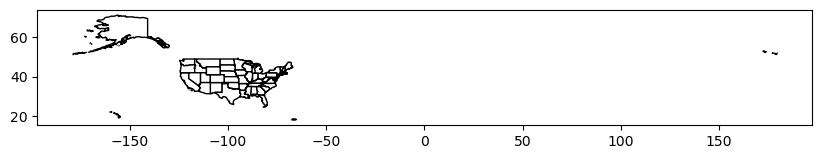

In [64]:
# Plot updated Voronoi diagram on the USA map
fig, ax = plt.subplots(figsize=(10, 10))
usa_map.plot(ax=ax, color='white', edgecolor='black')
voronoi_gdf.plot(ax=ax, alpha=0.7)
plt.show()
